In [15]:
from load_data import load_data

path='Files/'

runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo=load_data(path)

Run Name?:EARTH_T21
Pressure OOM?:0
Surface Press [bar]:1.0
 
--------------------------
|    ARRAY DIMENSIONS    |
--------------------------
N_levels:  30
N_lons:    64
N_lats:    32
N_params:  6
 
PRESSURE ARRAY: 
[0.03225806 0.06451613 0.09677419 0.12903226 0.16129032 0.19354839
 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871 0.38709677
 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871  0.58064516
 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548 0.77419355
 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387 0.96774194]
 
LATITUDE ARRAY: 
[ 85.761   80.269   74.745   69.213   63.679   58.143   52.607   47.07
  41.532   35.995   30.458   24.92    19.382   13.844    8.3067   2.7689
  -2.7689  -8.3067 -13.844  -19.382  -24.92   -30.458  -35.995  -41.532
 -47.07   -52.607  -58.143  -63.679  -69.213  -74.745  -80.269  -85.761 ]
 
LONGITUDE ARRAY: 
[  0.      5.625  11.25   16.875  22.5    28.125  33.75   39.375  45.
  50.625  56.25   61.875  67.5    73.125  78.75 

# ----------------------------------
#  Temperature Contour Plots 

-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min VWind [m/s], Plot limit:  -12.304 -33.0
Max VWind [m/s], Plot limit:  16.372 33.0
-------------------------------------------------------


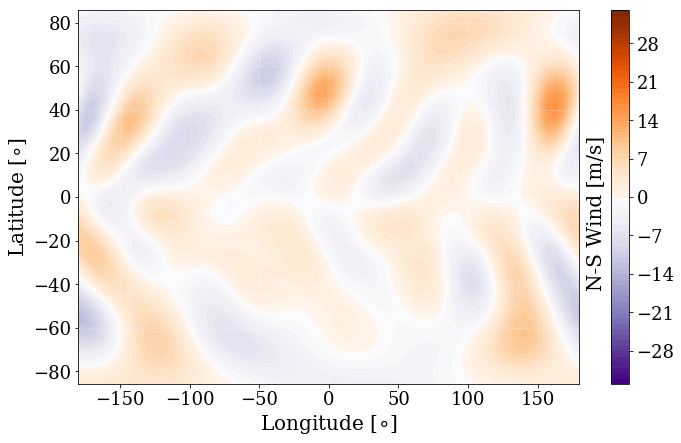

In [16]:
from igcm_Plot import igcm_Plot

lev=29

plot=2              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=2.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False         #orthographic projection
latcenter=40.0       #center of plot in degrees, ONLY WORKS FOR ORTHO=True
loncenter=180.0 

freeze=False         #adds a black line at water freezing temperature,useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''
    
savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'


ver=True           #verbose output, PLOTS AND TEXT

cbarL=-33.0 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=33.0 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

%matplotlib inline
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
###########################
#plot=1
#ptype='UWIND'
#savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

#igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
###########################
#plot=2
#ptype='VWIND'
#savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

#igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
###########################
#plot=3
#ptype='STREAM'
#savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.png'

#igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)


In [4]:
## Maybe you want a movie showing the last orbit....
import numpy as np
import imageio
import os
from igcm_Plot import igcm_Plot


lev=29

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=2.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=2           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=2           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False         #orthographic projection
latcenter=0.0       #center of plot in degrees, ONLY WORKS FOR ORTHO=True
loncenter=0.0 

freeze=True         #adds a black line at water freezing temperature, useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''
    
savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

ver=False           #verbose output, PLOTS AND TEXT

cbarL=np.nanmin(data_lo[lev,:,:,0,:]) #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=np.nanmax(data_lo[lev,:,:,0,:]) #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature
cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

savepath=path+runname+'/LastOrb_F/'

nouts=data_lo.shape[-1]
for t in range(0,nouts):
    lo=True  #holder for last orbit
    savename=savepath+str.zfill(str(int(t)),4)+'.png'
    igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_lo[:,:,:,:,t],lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,lo)
    
file_names = sorted((fn for fn in os.listdir(savepath)if fn.endswith('.png')))
images=[]
for filename in file_names:
    images.append(imageio.imread(savepath+filename))
imageio.mimsave(savepath+'lastorb.gif',images,duration=0.35)

In [3]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
seed(1234)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)

In [4]:
print x.shape
print y.shape
print z.shape

(200,)
(200,)
(200,)


In [7]:
print data_lo.shape
print data_lo[29,0,0,0,0]
print data_lo[29,0,0,1,0]
print data_lo[29,0,0,2,0]

(30, 128, 64, 3, 90)
258.96
11.517
3.5982
